In [1]:
#create dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
from scipy.stats import linregress

In [3]:
#import csv files and #turn csv into a dataframe
csv = "../Resources/natural_gas_CO2_by_state_2017.csv"
coal_data = pd.read_csv(csv)
coal_data.head()

,State,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,Percent,Absolute
0,Alabama,14.7,14.9,13.4,12.2,12.7,12.0,11.1,11.3,12.9,...,28.8,32.3,35.9,33.1,34.5,37.2,37.9,36.1,145.60%,21.4
1,Alaska,8.1,6.5,12.6,12.7,13.7,11.3,11.0,13.3,15.3,...,17.8,18,18.4,17.6,17.5,17.7,17.5,18.2,124.70%,10.1
2,Arizona,9.2,10.2,7.5,6.4,6.7,7.3,5.6,6.4,6.8,...,17.8,15.5,17.9,18,16.7,19.3,19.8,17.8,93.50%,8.6
3,Arkansas,14.5,14,12.0,11.2,11.4,10.6,10.7,9.1,11.6,...,14.5,15.3,15.9,15.2,14.4,15.7,16.7,16.8,15.90%,2.3
4,California,100.1,103.1,93.5,84.8,92.1,102.0,84.3,105.6,98.5,...,123.2,116.4,130.1,131.4,127.7,126.3,119.1,115.9,15.80%,15.8


# States on  Natural Gas CO2 from 2000 - 2012 (with linear regression line) 3 plots 

### Plot scatter and regression line for Natural Gas Emission (New York 2000-2012)

In [5]:
#extractiong new york data from 2000-2012 
coal_New_York_data=coal_data[(coal_data['State'] == 'New York')]
coal_New_York_data=coal_New_York_data[['2000', '2001', '2002',"2003","2004","2006","2007","2008","2009","2010","2011","2012"]]
coal_New_York_data

,2000,2001,2002,2003,2004,2006,2007,2008,2009,2010,2011,2012
32,67.8,63.9,65,59.9,59.7,59.4,64.4,63.9,61.8,64.9,66.1,66.8


In [6]:
#transpose the new york data
coal_New_York_data_transposed = coal_New_York_data.T # or df1.transpose()
coal_New_York_data_transposed

,32
2000,67.8
2001,63.9
2002,65
2003,59.9
2004,59.7
2006,59.4
2007,64.4
2008,63.9
2009,61.8
2010,64.9


In [7]:
modified = coal_New_York_data_transposed.reset_index()
modified

,index,32
0,2000,67.8
1,2001,63.9
2,2002,65
3,2003,59.9
4,2004,59.7
5,2006,59.4
6,2007,64.4
7,2008,63.9
8,2009,61.8
9,2010,64.9


In [8]:
coal_New_York_data_transposed=modified.rename(columns={"index": "Year"})
coal_New_York_data_transposed

,Year,32
0,2000,67.8
1,2001,63.9
2,2002,65
3,2003,59.9
4,2004,59.7
5,2006,59.4
6,2007,64.4
7,2008,63.9
8,2009,61.8
9,2010,64.9


In [9]:
coal_New_York_data_transposed=coal_New_York_data_transposed.rename(columns={32: "C02 emission (ppm)"})
coal_New_York_data_transposed

,Year,C02 emission (ppm)
0,2000,67.8
1,2001,63.9
2,2002,65
3,2003,59.9
4,2004,59.7
5,2006,59.4
6,2007,64.4
7,2008,63.9
8,2009,61.8
9,2010,64.9


In [10]:
x_values = coal_New_York_data_transposed["Year"]
y_values = coal_New_York_data_transposed["C02 emission (ppm)"]

In [12]:
x_values=x_values.astype('float')
y_values=y_values.astype('float')

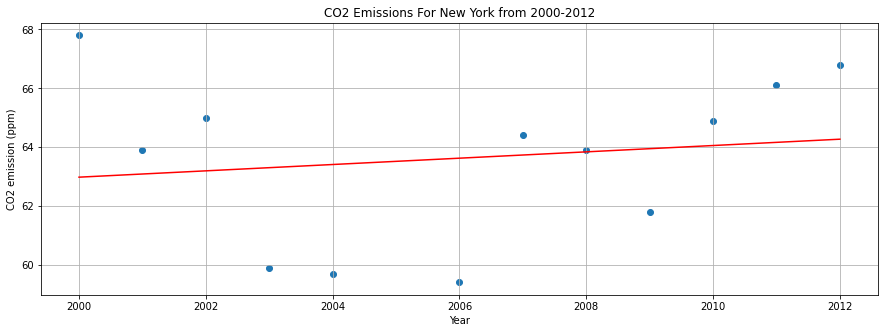

In [13]:
fig= plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("CO2 emission (ppm)")
plt.title("CO2 Emissions For New York from 2000-2012")
plt.grid(True)
plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


linregress(x_values,regress_values)
plt.plot(x_values, intercept + slope*x_values, 'r', label='fitted line')
plt.grid(True)

## Plot scatter and regression line for Nataural Gas Emission (California 2000-2012)

In [14]:
#extractiong California data from 2000-2012 
coal_California_data=coal_data[(coal_data['State'] == 'California')]
coal_California_data=coal_California_data[['2000', '2001', '2002',"2003","2004","2006","2007","2008","2009","2010","2011","2012"]]
coal_California_data

,2000,2001,2002,2003,2004,2006,2007,2008,2009,2010,2011,2012
4,130.1,133.2,122.8,122.7,130.4,125.9,130.8,131,126.7,123.2,116.4,130.1


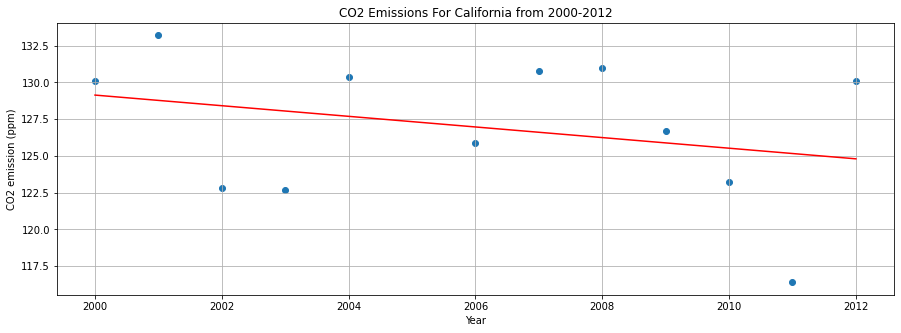

In [15]:
#transpose the California data 
#modified the index
#and rename the column
#changing the column type as float
coal_California_data_transposed = coal_California_data.T # or df1.transpose()
modified1 = coal_California_data_transposed.reset_index()
coal_California_data_transposed=modified1.rename(columns={"index": "Year"})
coal_California_data_transposed=coal_California_data_transposed.rename(columns={4: "C02 emission (ppm)"})
x1_values = coal_California_data_transposed["Year"]
y1_values = coal_California_data_transposed["C02 emission (ppm)"]
x1_values=x1_values.astype('float')
y1_values=y1_values.astype('float')


fig= plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("CO2 emission (ppm)")
plt.title("CO2 Emissions For California from 2000-2012")
plt.grid(True)
plt.scatter(x1_values,y1_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x1_values, y1_values)
regress_values = x1_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


linregress(x1_values,regress_values)
plt.plot(x1_values, intercept + slope*x_values, 'r', label='fitted line')
plt.grid(True)


## Plot scatter and regression line for emission (Illinois 2000-2012)

In [16]:
#extractiong Illinois data from 2000-2012 
coal_Illinois_data=coal_data[(coal_data['State'] == 'Illinois')]
coal_Illinois_data=coal_Illinois_data[['2000', '2001', '2002',"2003","2004","2006","2007","2008","2009","2010","2011","2012"]]
coal_Illinois_data

,2000,2001,2002,2003,2004,2006,2007,2008,2009,2010,2011,2012
13,55.7,51.4,56.3,53.7,51.2,48.1,51.9,53.7,51.3,51.6,52.8,50.3


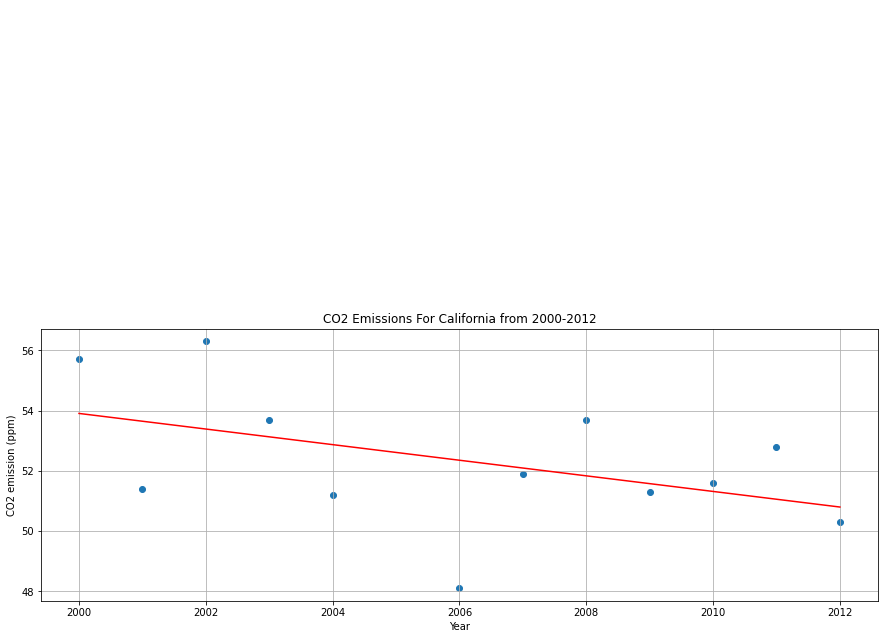

In [17]:
#transpose the California data 
#modified the index
#and rename the column
#changing the column type as float
coal_Illinois_data_transposed = coal_Illinois_data.T # or df1.transpose()
modified2 = coal_Illinois_data_transposed.reset_index()
coal_Illinois_data_transposed=modified2.rename(columns={"index": "Year"})
coal_Illinois_data_transposed=coal_Illinois_data_transposed.rename(columns={13: "C02 emission (ppm)"})
x2_values = coal_Illinois_data_transposed["Year"]
y2_values = coal_Illinois_data_transposed["C02 emission (ppm)"]
x2_values=x2_values.astype('float')
y2_values=y2_values.astype('float')


fig= plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("CO2 emission (ppm)")
plt.title("CO2 Emissions For Illinois from 2000-2012")
plt.grid(True)
plt.scatter(x2_values,y2_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x2_values, y2_values)
regress_values = x2_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


linregress(x2_values,regress_values)
plt.plot(x2_values, intercept + slope*x_values, 'r', label='fitted line')
plt.annotate(line_eq,(2000,67),fontsize=15,color="red")
plt.grid(True)